### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 

In [1]:
#Download the dataset
!wget $'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

--2025-10-12 16:19:22--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv.13’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.002s  

2025-10-12 16:19:22 (50.5 MB/s) - ‘course_lead_scoring.csv.13’ saved [80876/80876]



In [2]:
#Load into a pandas DataFrame
import pandas as pd

df = pd.read_csv("course_lead_scoring.csv")

In [3]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
#checkin the column data types
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
#creating list of categorical features
categ_cols = list(df.dtypes[df.dtypes=='O'].index)
categ_cols

['lead_source', 'industry', 'employment_status', 'location']

In [6]:
#creating list of numerical features
num_cols = list(df.dtypes[df.dtypes!='O'].index)

#removing the target variable (converted) from the numerical features list
num_cols = ['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [7]:
#checking for missing values for the categorical features
df[categ_cols].isnull().sum()

lead_source          128
industry             134
employment_status    100
location              63
dtype: int64

In [8]:
#categorical features, missing values replaced with 'NA'
for col in categ_cols:
    df[col]=df[col].fillna('NA')

In [9]:
#checking for missing values for the numerical features
df[num_cols].isnull().sum()

number_of_courses_viewed      0
annual_income               181
interaction_count             0
lead_score                    0
dtype: int64

In [10]:
#numerical features, missing values replaced with '0'
df['annual_income'] = df['annual_income'].fillna(0) 

In [11]:
#checking all the missing values are replaced
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`

In [12]:
df.industry.value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [13]:
df.industry.mode()[0]

'retail'

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
num_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [16]:
corr_matrix = df[num_cols].corr(method='pearson')
corr_matrix

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


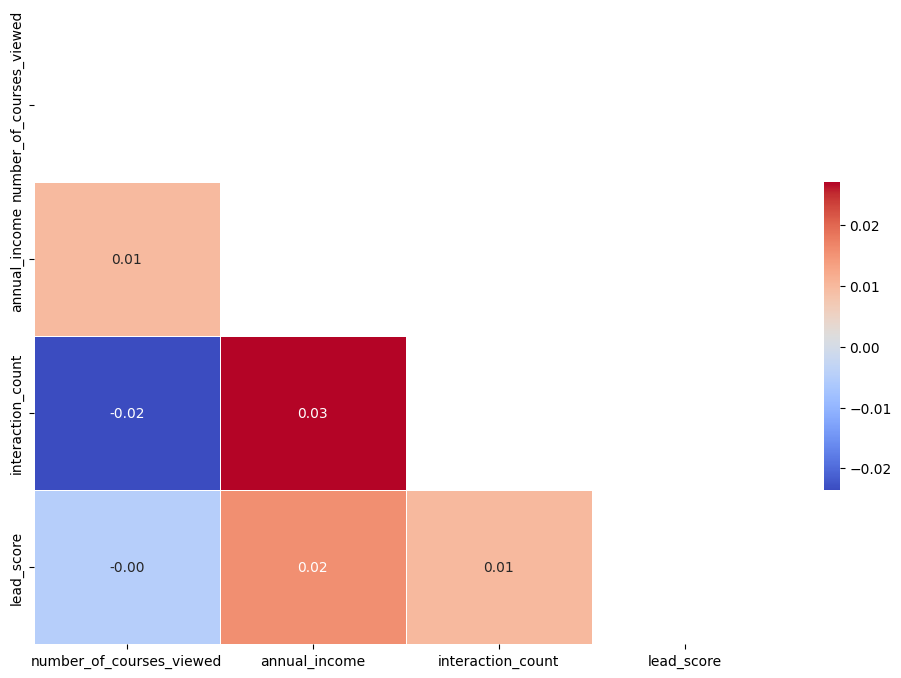

In [17]:
#create a mask for upper triangle, helps with visualization
mask = np.triu(np.ones_like(corr_matrix, dtype = bool) )

#set up the matplotlib figure
plt.figure(figsize=(12, 8) )

#draw a heatmap
sns.heatmap(corr_matrix,mask=mask,cmap="coolwarm",annot=True,fmt=".2f",linewidths=.5,cbar_kws={"shrink":.5} )

plt.show()

In [18]:
corr_unstacked = corr_matrix.unstack().sort_values(ascending=False)
# Remove self-correlations (always 1.0)
corr_unstacked = corr_unstacked[corr_unstacked < 1]

print(corr_unstacked.head(5))

annual_income      interaction_count    0.027036
interaction_count  annual_income        0.027036
lead_score         annual_income        0.015610
annual_income      lead_score           0.015610
lead_score         interaction_count    0.009888
dtype: float64


<b>The feature pair with stronger correlation are</b> <u>annual_income and interaction_count

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=42)

In [21]:
len(df_full_train),len(df_test)

(1169, 293)

In [22]:
# we are goint to split into train and validation, since df_full_train is 80% of the original dataset we have to check how much 20% is out of 80%, and that is 80%/20% = 25%
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=42)

In [23]:
len(df_train), len(df), len(df_val),len(df_test)

(876, 1462, 293, 293)

In [24]:
#make the index sequential - THIS STEP IS NOT NECESSARY IS JUST TO HAVE THE INDEX ORDERED
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
#assign the target variable 'y'
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [26]:
#remove 'y' variable from my dataframe
del df_train['converted']
del df_val['converted']
del df_test['converted']

### Question 3

* Calculate the mutual information score between `converted` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source`
- `employment_status`

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
def mutual_info_y_score(series):
    return mutual_info_score(series,df_full_train.converted)

In [29]:
df_full_train[categ_cols].apply(mutual_info_y_score).round(3).sort_values(ascending=False)

lead_source          0.026
employment_status    0.013
industry             0.012
location             0.002
dtype: float64

In [30]:
top_feature =df_full_train[categ_cols].apply(mutual_info_y_score).round(3).sort_values(ascending=False)

print(f"The feature with the biggest mutual information score is the {top_feature.index[0]} and has the value {top_feature.iloc[0]}")

The feature with the biggest mutual information score is the lead_source and has the value 0.026


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94

In [31]:
#Include categorical variables in the dataset using one-hot encoding.

# Select numeric and categorical columns and convert to list of dictionaries
train_dicts = df_train[num_cols+categ_cols].to_dict(orient='records')

# Import DictVectorizer for one-hot encoding
from sklearn.feature_extraction import DictVectorizer


# Initialize the vectorizer (dense output)
dv = DictVectorizer(sparse=False)

# Fit the vectorizer on training data
dv.fit(train_dicts)

# Transform the dictionaries into a numeric matrix
X_train = dv.transform(train_dicts)

In [32]:
#For validation dataset
val_dicts = df_val[num_cols+categ_cols].to_dict(orient='records')

#fit again on the validation set, you are leaking information from the validation data into your model training,
#which breaks the principle of having a “truly unseen” dataset.
X_val = dv.transform(val_dicts)

In [33]:
#Fit the model on the training dataset, model = LogisticRegression(solver='liblinear' C=1.0, max_iter=1000, random_state=42)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
#Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
from sklearn.metrics import accuracy_score

# predict on validation dataset
y_val_pred = model.predict(X_val)

# calculate accuracy
accuracy = accuracy_score(y_val,y_val_pred)

print("The validation accuracy is ", round(accuracy,2) )

The validation accuracy is  0.7


In [35]:
y_pred_val = model.predict_proba(X_val)[:, 1] >= 0.5
acc = (y_val == y_pred_val).mean()
round(acc, 2)

np.float64(0.7)

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.

#### 5.1 Excluding <u><b>'industry'</b></u>

In [36]:
categ_cols

['lead_source', 'industry', 'employment_status', 'location']

In [37]:
categ_cols_w_industry = ['lead_source','employment_status','location']

In [38]:
#Include categorical variables in the dataset using one-hot encoding.

# Select numeric and categorical columns and convert to list of dictionaries
train_dicts_w_industry = df_train[num_cols+categ_cols_w_industry].to_dict(orient='records')

# Import DictVectorizer for one-hot encoding
from sklearn.feature_extraction import DictVectorizer


# Initialize the vectorizer (dense output)
dv = DictVectorizer(sparse=False)

# Fit the vectorizer on training data
dv.fit(train_dicts_w_industry)

# Transform the dictionaries into a numeric matrix
X_train_w_industry = dv.transform(train_dicts_w_industry)

In [39]:
#For validation dataset
val_dicts_w_industry = df_val[num_cols+categ_cols_w_industry].to_dict(orient='records')

#fit again on the validation set, you are leaking information from the validation data into your model training,
#which breaks the principle of having a “truly unseen” dataset.
X_val_w_industry = dv.transform(val_dicts_w_industry)

In [40]:
#Fit the model on the training dataset, model = LogisticRegression(solver='liblinear' C=1.0, max_iter=1000, random_state=42)
from sklearn.linear_model import LogisticRegression

model_w_industry = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_w_industry.fit(X_train_w_industry, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [41]:
#Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
from sklearn.metrics import accuracy_score

# predict on validation dataset
y_val_pred_w_industry = model_w_industry.predict(X_val_w_industry)

# calculate accuracy
accuracy_w_industry = accuracy_score(y_val,y_val_pred_w_industry)

print("The validation accuracy is ",accuracy_w_industry)

The validation accuracy is  0.6996587030716723


#### 5.2 Excluding <u><b>'employment_status'</b></u>

In [42]:
categ_cols

['lead_source', 'industry', 'employment_status', 'location']

In [43]:
categ_cols_w_employment_status = ['lead_source','industry','location']

In [44]:
#Include categorical variables in the dataset using one-hot encoding.

# Select numeric and categorical columns and convert to list of dictionaries
train_dicts_w_employment_status = df_train[num_cols+categ_cols_w_employment_status].to_dict(orient='records')

# Import DictVectorizer for one-hot encoding
from sklearn.feature_extraction import DictVectorizer


# Initialize the vectorizer (dense output)
dv = DictVectorizer(sparse=False)

# Fit the vectorizer on training data
dv.fit(train_dicts_w_employment_status)

# Transform the dictionaries into a numeric matrix
X_train_w_employment_status = dv.transform(train_dicts_w_employment_status)

In [45]:
#For validation dataset
val_dicts_w_employment_status = df_val[num_cols+categ_cols_w_employment_status].to_dict(orient='records')

#fit again on the validation set, you are leaking information from the validation data into your model training,
#which breaks the principle of having a “truly unseen” dataset.
X_val_w_employment_status = dv.transform(val_dicts_w_employment_status)

In [46]:
#Fit the model on the training dataset, model = LogisticRegression(solver='liblinear' C=1.0, max_iter=1000, random_state=42)
from sklearn.linear_model import LogisticRegression

model_w_employment_status = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_w_employment_status.fit(X_train_w_employment_status, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
#Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
from sklearn.metrics import accuracy_score

# predict on validation dataset
y_val_pred_w_employment_status = model_w_employment_status.predict(X_val_w_employment_status)

# calculate accuracy
accuracy_w_employment_status = accuracy_score(y_val,y_val_pred_w_employment_status)

print("The validation accuracy is ",accuracy_w_employment_status)

The validation accuracy is  0.6962457337883959


#### 5.3 Excluding <u><b>'lead_score'</b></u>

In [48]:
num_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [49]:
num_cols_w_lead_score = ['number_of_courses_viewed','annual_income','interaction_count']

In [50]:
#Include categorical variables in the dataset using one-hot encoding.

# Select numeric and categorical columns and convert to list of dictionaries
train_dicts_w_lead_score = df_train[num_cols_w_lead_score+categ_cols].to_dict(orient='records')

# Import DictVectorizer for one-hot encoding
from sklearn.feature_extraction import DictVectorizer


# Initialize the vectorizer (dense output)
dv = DictVectorizer(sparse=False)

# Fit the vectorizer on training data
dv.fit(train_dicts_w_lead_score)

# Transform the dictionaries into a numeric matrix
X_train_w_lead_score = dv.transform(train_dicts_w_lead_score)

In [51]:
#For validation dataset
val_dicts_w_lead_score = df_val[num_cols_w_lead_score+categ_cols].to_dict(orient='records')

#fit again on the validation set, you are leaking information from the validation data into your model training,
#which breaks the principle of having a “truly unseen” dataset.
X_val_w_lead_score = dv.transform(val_dicts_w_lead_score)

In [52]:
#Fit the model on the training dataset, model = LogisticRegression(solver='liblinear' C=1.0, max_iter=1000, random_state=42)
from sklearn.linear_model import LogisticRegression

model_w_lead_score = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_w_lead_score.fit(X_train_w_lead_score, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
#Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
from sklearn.metrics import accuracy_score

# predict on validation dataset
y_val_pred_w_lead_score = model_w_lead_score.predict(X_val_w_lead_score)

# calculate accuracy
accuracy_w_lead_score = accuracy_score(y_val,y_val_pred_w_lead_score)

print("The validation accuracy is ",accuracy_w_lead_score )

The validation accuracy is  0.7064846416382252


---------------------------------------------------------------------------------------------------------------------------------

In [54]:
print(f"The difference in accuracy between the data will all the features and without industry is: {abs(accuracy-accuracy_w_industry)} ")
print(f"The difference in accuracy between the data will all the features and without employment status is: {abs(accuracy-accuracy_w_employment_status)} ")
print(f"The difference in accuracy between the data will all the features and without lead score is: {abs(accuracy-accuracy_w_lead_score)} ")

The difference in accuracy between the data will all the features and without industry is: 0.0 
The difference in accuracy between the data will all the features and without employment status is: 0.0034129692832763903 
The difference in accuracy between the data will all the features and without lead score is: 0.0068259385665528916 


In [55]:
# Calculate the differences
differences = [
    abs(accuracy - accuracy_w_industry),
    abs(accuracy - accuracy_w_employment_status),
    abs(accuracy - accuracy_w_lead_score)
]

# Optional: add labels for clarity
labels = ['Industry', 'Employment Status', 'Lead Score']

# Combine labels and differences
diff_list = list(zip(labels, differences))

# Sort ascending by difference
diff_list_sorted = sorted(diff_list, key=lambda x: x[1])

# Print results
for feature, diff in diff_list_sorted:
    print(f"{feature}: {diff}")


Industry: 0.0
Employment Status: 0.0034129692832763903
Lead Score: 0.0068259385665528916


#### The <u>Lead Score</u> is the feature that lead to the minimum difference in the accuracy!!!

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [56]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# resetting the indices of the datasets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# setting the target variable
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

# ensuring that the target variables y is not in the datasets
del df_train['converted']
del df_val['converted']
del df_test['converted']


# creating a dictionary from complete dataset of train dataset/dataframe with categorical and numerical features/columns
train_dict = df_train[categorical_columns + numerical_columns[:-1]].to_dict(orient='records')

# creating the final train dataset by one-hot-encoding the categorical values in the dataset
X_train = dv.fit_transform(train_dict)

# creating a dictionary from complete dataset of validation dataset/dataframe with categorical and numerical features/columns
val_dict = df_val[categorical_columns + numerical_columns[:-1]].to_dict(orient='records')

# creating the final validation dataset by one-hot-encoding the categorical values in the dataset
X_val = dv.transform(val_dict)

In [57]:
numerical_columns[:-1]

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [58]:
numerical_columns

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [59]:
num_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [60]:
categ_cols

['lead_source', 'industry', 'employment_status', 'location']

In [61]:
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [62]:
c_values = [0.01, 0.1, 1, 10, 100]
results = []

for c in c_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on validation dataset
    y_val_pred = model.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    #accuracy = round((y_val == y_val_pred).mean(), 3)
    results.append((c, accuracy))

# Sort results by accuracy (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Display results
for c, acc in results:
    #print(f"C={c}: Validation Accuracy = {round(acc, 4)}")
    print(f"C={c}: Validation Accuracy = {acc}")
    

C=0.01: Validation Accuracy = 0.6996587030716723
C=0.1: Validation Accuracy = 0.6996587030716723
C=1: Validation Accuracy = 0.6996587030716723
C=10: Validation Accuracy = 0.6996587030716723
C=100: Validation Accuracy = 0.6996587030716723


In [ ]:
Would be 0.01